Mean: 127.50000000000001
SD: 73.7226788832994


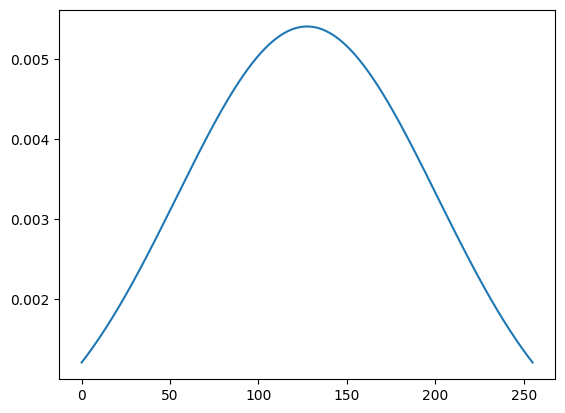

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 
  
# Plot between 0 and 255 with 1000 steps.
x = np.linspace(0, 255, 1000)

# Calculating mean and standard deviation 
mean = statistics.mean(x) 
sd = statistics.stdev(x)

print('Mean:', mean)
print('SD:', sd)

# Calculate and plot probability density function
pdf_norm = norm.pdf(x, mean, sd)
plt.plot(x, pdf_norm) 
plt.show()

In [5]:
def sample_pdf(pdf):
    samples = np.random.choice(x, size=(50, 50, 3), p=pdf/np.sum(pdf))
    samples = np.uint8(samples)

    plt.hist(samples.flatten(), density=True, alpha=0.2)
    plt.plot(x, pdf) 
    plt.show()

    return samples

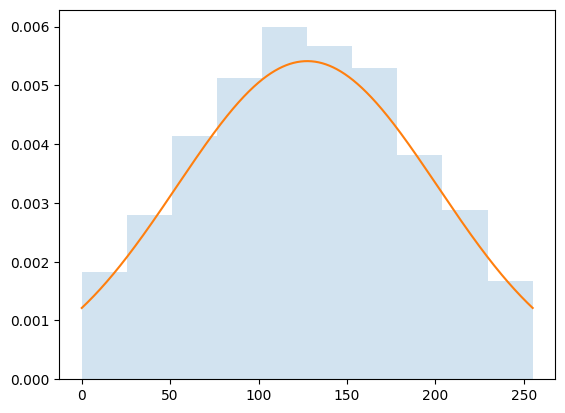

In [6]:
norm = sample_pdf(pdf_norm)

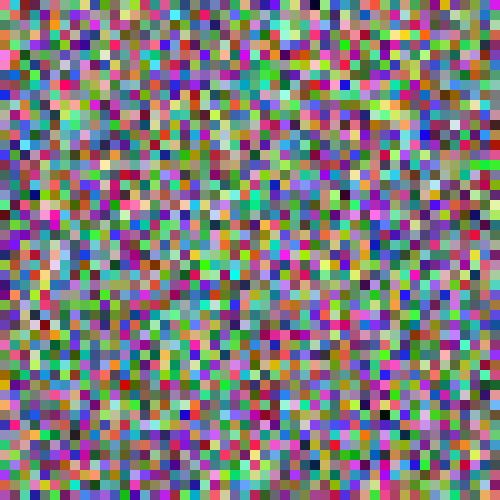

In [8]:
from PIL import Image

img = Image.fromarray(norm)
img = img.resize((500, 500), Image.NEAREST)

display(img)